In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import os
from datetime import datetime
import sys
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
def trend_line_on_time(trend_1d: xr.DataArray,
                       annual_mean: xr.DataArray) -> xr.DataArray:
    """Build trend line on same datetime time axis as annual_mean."""
    n_time = annual_mean.sizes["time"]
    t_idx = xr.DataArray(np.arange(n_time), dims=("time",))

    intercept = trend_1d.sel(degree=0)
    slope     = trend_1d.sel(degree=1)

    line = intercept + slope * t_idx
    # put onto the datetime axis of annual_mean
    line = line.assign_coords(time=annual_mean["time"])
    return line

In [29]:
# ensmean
ensmean_S3_lai_trend = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/ensmean/test_locations/S3/trend_1D/lai_trend_1D.nc")  
ensmean_S3_lai_iav = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/ensmean/test_locations/S3/iav_1D/lai_iav_1D.nc")
ensmean_S3_lai_seasonality = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/ensmean/test_locations/S3/seasonality_1D/lai_seasonality_1D.nc")
ensmean_S3_lai_annual_mean = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/ensmean/test_locations/S3/annual_mean/lai_annual_mean.nc")
ens_S3_lai_line = trend_line_on_time(ensmean_S3_lai_trend, ensmean_S3_lai_annual_mean)

# stable
Stable_Emulator_S3_lai_trend = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/Stable_Emulator/test_locations/S3/trend_1D/lai_trend_1D.nc")  
Stable_Emulator_S3_lai_iav = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/Stable_Emulator/test_locations/S3/iav_1D/lai_iav_1D.nc")
Stable_Emulator_S3_lai_seasonality = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/Stable_Emulator/test_locations/S3/seasonality_1D/lai_seasonality_1D.nc")
Stable_Emulator_S3_lai_annual_mean = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/Stable_Emulator/test_locations/S3/annual_mean/lai_annual_mean.nc")
Stable_Emulator_S3_lai_line = trend_line_on_time(Stable_Emulator_S3_lai_trend, Stable_Emulator_S3_lai_annual_mean)

# TL
TL_Emulator_S3_lai_trend = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/TL_Emulator_1982_2018/S3/test_locations/full/trend_1D/lai_trend_1D.nc")  
TL_Emulator_S3_lai_iav = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/TL_Emulator_1982_2018/S3/test_locations/full/iav_1D/lai_iav_1D.nc")
TL_Emulator_S3_lai_seasonality = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/TL_Emulator_1982_2018/S3/test_locations/full/seasonality_1D/lai_seasonality_1D.nc")
TL_Emulator_S3_lai_annual_mean = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/TL_Emulator_1982_2018/S3/test_locations/full/annual_mean/lai_annual_mean.nc")
TL_Emulator_S3_lai_line = trend_line_on_time(TL_Emulator_S3_lai_trend, TL_Emulator_S3_lai_annual_mean)

# AVH15C1
avh15c1_lai_trend = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/AVH15C1/S3/test_locations/trend_1D/lai_avh15c1_trend_1D.nc")
avh15c1_lai_iav = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/AVH15C1/S3/test_locations/iav_1D/lai_avh15c1_iav_1D.nc")
avh15c1_lai_annual_mean = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/AVH15C1/S3/test_locations/annual_mean_3D/lai_avh15c1_annual_mean_3D.nc")
avh15c1_lai_seasonality = xr.open_dataarray("/Net/Groups/BGI/people/ecathain/TRENDY_Emulator_Scripts/NewModel/data/analysis/metrics/AVH15C1/S3/test_locations/seasonality_1D/lai_avh15c1_seasonality_1D.nc")
avh15c1_lai_line = trend_line_on_time(avh15c1_lai_trend, avh15c1_lai_annual_mean)

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

colors = {
    "ens":    "#D55E00",  # Ensemble
    "stable": "#009E73",  # Stable-Emulator
    "tl":     "#CC79A7",  # TL-Emulator
    "obs":    "#0072B2",  # AVH15C1 observations
}

def _collapse_to_1d_time(da):
    """Mean over all non-time dims so we get a 1D time series."""
    if "time" not in da.dims:
        raise ValueError(f"'time' not in dims {da.dims}")
    other_dims = [d for d in da.dims if d != "time"]
    if other_dims:
        da = da.mean(dim=other_dims)
    return da

def _collapse_to_1d_month(da):
    """Mean over all non-month dims so we get a 1D seasonal cycle."""
    if "month" not in da.dims:
        raise ValueError(f"'month' not in dims {da.dims}")
    other_dims = [d for d in da.dims if d != "month"]
    if other_dims:
        da = da.mean(dim=other_dims)
    return da

def _crop_year_range(da, start_year, end_year):
    """Subset a 1D time series to [start_year, end_year]."""
    t = da["time"]
    if hasattr(t, "dt"):  # datetime-like or cftime
        mask = (t.dt.year >= start_year) & (t.dt.year <= end_year)
    else:                 # plain numeric years
        mask = (t >= start_year) & (t <= end_year)
    return da.sel(time=mask)

def plot_lai_annual_and_seasonality_four_series(
    ens_annual, stable_annual, tl_annual, avh_annual,
    ens_season, stable_season, tl_season, avh_season,
    var_label="Leaf Area Index",
    units="m² m⁻²",
    start_year=1982,
    end_year=2018,
):
    """
    Left: annual mean LAI for three emulators + AVH15C1 (space-averaged),
          cropped to [start_year, end_year].
    Right: mean seasonal cycle (month 1–12) for the same four series.
    """

    # ---- Collapse to 1D (time) for annual means ----
    ens_annual_1d    = _collapse_to_1d_time(ens_annual)
    stable_annual_1d = _collapse_to_1d_time(stable_annual)
    tl_annual_1d     = _collapse_to_1d_time(tl_annual)
    avh_annual_1d    = _collapse_to_1d_time(avh_annual)

    # ---- Crop to requested year range ----
    ens_annual_1d    = _crop_year_range(ens_annual_1d,    start_year, end_year)
    stable_annual_1d = _crop_year_range(stable_annual_1d, start_year, end_year)
    tl_annual_1d     = _crop_year_range(tl_annual_1d,     start_year, end_year)
    avh_annual_1d    = _crop_year_range(avh_annual_1d,    start_year, end_year)

    # x-axes (years)
    def _to_year_axis(da):
        t = da["time"]
        return t.dt.year if hasattr(t, "dt") else t

    x_ens = _to_year_axis(ens_annual_1d)
    x_stb = _to_year_axis(stable_annual_1d)
    x_tl  = _to_year_axis(tl_annual_1d)
    x_obs = _to_year_axis(avh_annual_1d)

    # ---- Collapse to 1D (month) for seasonality ----
    ens_season_1d    = _collapse_to_1d_month(ens_season)
    stable_season_1d = _collapse_to_1d_month(stable_season)
    tl_season_1d     = _collapse_to_1d_month(tl_season)
    avh_season_1d    = _collapse_to_1d_month(avh_season)

    months = ens_season_1d["month"].values

    #fig, (ax_ann, ax_seas) = plt.subplots(1, 2, figsize=(12, 4))
    fig, (ax_ann, ax_seas) = plt.subplots(1, 2, figsize=(12, 3.2))
    # ---------- LEFT: Annual means ----------
    ax_ann.plot(
        x_ens, ens_annual_1d,
        label="TRENDY-Ensemble Mean",
        color=colors["ens"], linewidth=1.8,
    )
    ax_ann.plot(
        x_stb, stable_annual_1d,
        label="Stable-Emulator",
        color=colors["stable"], linewidth=1.8,
    )
    ax_ann.plot(
        x_tl, tl_annual_1d,
        label="TL-Emulator",
        color=colors["tl"], linewidth=1.8,
    )
    ax_ann.plot(
        x_obs, avh_annual_1d,
        label="AVH15C1",
        color=colors["obs"], linewidth=1.8,
    )

    ax_ann.set_xlabel("Year")
    ax_ann.set_ylabel(f"{var_label} ({units})")
    ax_ann.set_title("Annual means", fontweight="bold", fontsize=13)
    ax_ann.grid(True, which="major", alpha=0.3)
    ax_ann.minorticks_on()
    ax_ann.grid(True, which="minor", alpha=0.1, linewidth=0.5)
    for spine in ("top", "right"):
        ax_ann.spines[spine].set_visible(False)

    # ---------- RIGHT: Seasonality ----------
    ax_seas.plot(
        months, ens_season_1d,
        label="TRENDY-Ensemble Seasonality",
        color=colors["ens"], linewidth=1.8,
    )
    ax_seas.plot(
        months, stable_season_1d,
        label="Stable-Emulator Seasonality",
        color=colors["stable"], linewidth=1.8,
    )
    ax_seas.plot(
        months, tl_season_1d,
        label="TL-Emulator Seasonality",
        color=colors["tl"], linewidth=1.8,
    )
    ax_seas.plot(
        months, avh_season_1d,
        label="AVH15C1 Seasonality",
        color=colors["obs"], linewidth=1.8,
    )

    ax_seas.set_xlabel("Month")
    ax_seas.set_title("Mean seasonal cycle", fontweight="bold", fontsize=13)
    ax_seas.set_xticks(np.arange(1, 13))
    ax_seas.set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])
    ax_seas.grid(True, which="major", alpha=0.3)
    ax_seas.minorticks_on()
    ax_seas.grid(True, which="minor", alpha=0.1, linewidth=0.5)
    for spine in ("top", "right"):
        ax_seas.spines[spine].set_visible(False)

    # Shared legend
    handles, labels = ax_ann.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.02),
        ncol=4,
        frameon=False,
    )

    fig.tight_layout(rect=(0.0, 0.05, 1.0, 1.0))
    return fig, (ax_ann, ax_seas)

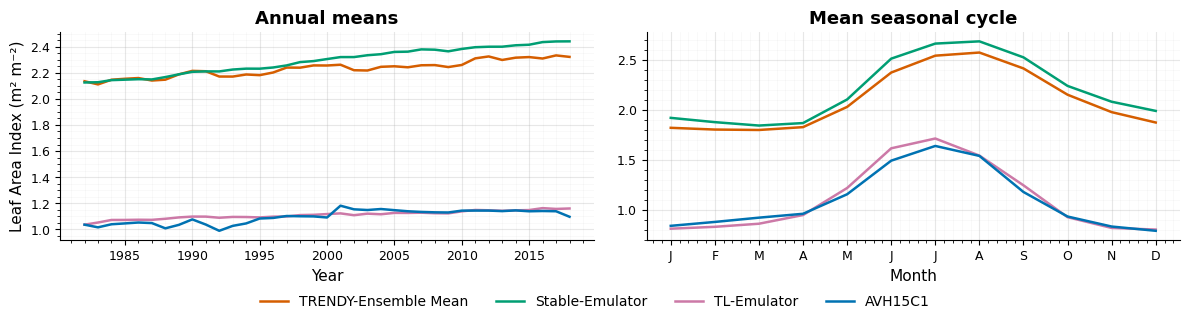

In [39]:
fig, axes = plot_lai_annual_and_seasonality_four_series(
    ensmean_S3_lai_annual_mean,
    Stable_Emulator_S3_lai_annual_mean,
    TL_Emulator_S3_lai_annual_mean,
    avh15c1_lai_annual_mean,
    ensmean_S3_lai_seasonality,
    Stable_Emulator_S3_lai_seasonality,
    TL_Emulator_S3_lai_seasonality,
    avh15c1_lai_seasonality,
    var_label="Leaf Area Index",
    units="m² m⁻²",
    start_year=1982,
    end_year=2018,
)
plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

colors = {
    "ens":    "#D55E00",  # Ensemble
    "stable": "#009E73",  # Stable-Emulator
    "tl":     "#CC79A7",  # TL-Emulator
    "obs":    "#0072B2",  # AVH15C1 observations
}

def _collapse_to_1d_time(da):
    """Mean over all non-time dims so we get a 1D time series."""
    if "time" not in da.dims:
        raise ValueError(f"'time' not in dims {da.dims}")
    other_dims = [d for d in da.dims if d != "time"]
    if other_dims:
        da = da.mean(dim=other_dims)
    return da

def _collapse_to_1d_month(da):
    """Mean over all non-month dims so we get a 1D seasonal cycle."""
    if "month" not in da.dims:
        raise ValueError(f"'month' not in dims {da.dims}")
    other_dims = [d for d in da.dims if d != "month"]
    if other_dims:
        da = da.mean(dim=other_dims)
    return da

def _crop_year_range(da, start_year, end_year):
    """Subset a 1D time series with a *real* year-like time coord."""
    t = da["time"]
    # Only crop if time is datetime-like, otherwise just return as-is.
    if np.issubdtype(t.dtype, np.datetime64):
        years = t.dt.year
        mask = (years >= start_year) & (years <= end_year)
        return da.sel(time=mask)
    # If it's not datetime-like, assume already cropped correctly.
    return da

def _relabel_iav_time(da, start_year, end_year):
    """
    IAV files have time = 0..N-1 with no real years.
    Rebuild a year axis anchored at start_year and crop to [start_year, end_year].
    """
    da = _collapse_to_1d_time(da)
    n = da.sizes["time"]
    years = np.arange(start_year, start_year + n)
    da = da.assign_coords(time=("time", years))
    mask = (da["time"] >= start_year) & (da["time"] <= end_year)
    return da.sel(time=mask)

def plot_lai_annual_seasonality_iav_four_series(
    ens_annual, stable_annual, tl_annual, avh_annual,
    ens_season, stable_season, tl_season, avh_season,
    ens_iav, stable_iav, tl_iav, avh_iav,
    var_label="Leaf Area Index",
    units="m² m⁻²",
    start_year=1982,
    end_year=2018,
):
    """
    Left  : annual mean LAI for emulators + AVH15C1 (space-averaged), cropped to [start_year, end_year].
    Middle: mean seasonal cycle (month 1–12).
    Right : inter-annual variability (residuals) for each series, with a rebuilt year axis.
    """

    # ---- Annual means (collapse + crop using real time coord) ----
    ens_annual_1d    = _crop_year_range(_collapse_to_1d_time(ens_annual),    start_year, end_year)
    stable_annual_1d = _crop_year_range(_collapse_to_1d_time(stable_annual), start_year, end_year)
    tl_annual_1d     = _crop_year_range(_collapse_to_1d_time(tl_annual),     start_year, end_year)
    avh_annual_1d    = _crop_year_range(_collapse_to_1d_time(avh_annual),    start_year, end_year)

    def _to_year_axis(da):
        t = da["time"]
        return t.dt.year if hasattr(t, "dt") else t

    x_ens = _to_year_axis(ens_annual_1d)
    x_stb = _to_year_axis(stable_annual_1d)
    x_tl  = _to_year_axis(tl_annual_1d)
    x_obs = _to_year_axis(avh_annual_1d)

    # ---- Seasonality (collapse over non-month dims) ----
    ens_season_1d    = _collapse_to_1d_month(ens_season)
    stable_season_1d = _collapse_to_1d_month(stable_season)
    tl_season_1d     = _collapse_to_1d_month(tl_season)
    avh_season_1d    = _collapse_to_1d_month(avh_season)
    months = ens_season_1d["month"].values

    # ---- Inter-annual variability (relabel time → real years) ----
    ens_iav_1d    = _relabel_iav_time(ens_iav,    start_year, end_year)
    stable_iav_1d = _relabel_iav_time(stable_iav, start_year, end_year)
    tl_iav_1d     = _relabel_iav_time(tl_iav,     start_year, end_year)
    avh_iav_1d    = _relabel_iav_time(avh_iav,    start_year, end_year)

    x_iav_ens = ens_iav_1d["time"].values
    x_iav_stb = stable_iav_1d["time"].values
    x_iav_tl  = tl_iav_1d["time"].values
    x_iav_obs = avh_iav_1d["time"].values

    # ---- Figure and axes ----
    fig, (ax_ann, ax_seas, ax_iav) = plt.subplots(1, 3, figsize=(16, 4))

    # ---------- LEFT: Annual means ----------
    ax_ann.plot(x_ens, ens_annual_1d,    label="TRENDY-Ensemble", color=colors["ens"],    linewidth=1.8)
    ax_ann.plot(x_stb, stable_annual_1d, label="Stable-Emulator", color=colors["stable"], linewidth=1.8)
    ax_ann.plot(x_tl,  tl_annual_1d,     label="TL-Emulator",     color=colors["tl"],     linewidth=1.8)
    ax_ann.plot(x_obs, avh_annual_1d,    label="AVH15C1",         color=colors["obs"],    linewidth=1.8)

    ax_ann.set_xlabel("Year")
    ax_ann.set_ylabel(f"{var_label} ({units})")
    ax_ann.set_title("Annual means", fontweight="bold", fontsize=13)
    ax_ann.grid(True, which="major", alpha=0.3)
    ax_ann.minorticks_on()
    ax_ann.grid(True, which="minor", alpha=0.1, linewidth=0.5)
    for spine in ("top", "right"):
        ax_ann.spines[spine].set_visible(False)

    # ---------- MIDDLE: Seasonality ----------
    ax_seas.plot(months, ens_season_1d,    label="TRENDY-Ensemble Seasonality", color=colors["ens"],    linewidth=1.8)
    ax_seas.plot(months, stable_season_1d, label="Stable-Emulator Seasonality", color=colors["stable"], linewidth=1.8)
    ax_seas.plot(months, tl_season_1d,     label="TL-Emulator Seasonality",     color=colors["tl"],     linewidth=1.8)
    ax_seas.plot(months, avh_season_1d,    label="AVH15C1 Seasonality",         color=colors["obs"],    linewidth=1.8)

    ax_seas.set_xlabel("Month")
    ax_seas.set_title("Mean seasonal cycle", fontweight="bold", fontsize=13)
    ax_seas.set_xticks(np.arange(1, 13))
    ax_seas.set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])
    ax_seas.grid(True, which="major", alpha=0.3)
    ax_seas.minorticks_on()
    ax_seas.grid(True, which="minor", alpha=0.1, linewidth=0.5)
    for spine in ("top", "right"):
        ax_seas.spines[spine].set_visible(False)

    # ---------- RIGHT: Inter-annual variability ----------
    ax_iav.plot(x_iav_ens, ens_iav_1d,    label="TRENDY-Ensemble IAV", color=colors["ens"],    linewidth=1.5)
    ax_iav.plot(x_iav_stb, stable_iav_1d, label="Stable-Emulator IAV", color=colors["stable"], linewidth=1.5)
    ax_iav.plot(x_iav_tl,  tl_iav_1d,     label="TL-Emulator IAV",     color=colors["tl"],     linewidth=1.5)
    ax_iav.plot(x_iav_obs, avh_iav_1d,    label="AVH15C1 IAV",         color=colors["obs"],    linewidth=1.5)

    ax_iav.set_xlabel("Year")
    ax_iav.set_title("Inter-annual variability", fontweight="bold", fontsize=13)
    ax_iav.axhline(0, color="0.5", linewidth=0.8, linestyle="--")
    ax_iav.grid(True, which="major", alpha=0.3)
    ax_iav.minorticks_on()
    ax_iav.grid(True, which="minor", alpha=0.1, linewidth=0.5)
    for spine in ("top", "right"):
        ax_iav.spines[spine].set_visible(False)

    # Shared legend from left panel
    handles, labels = ax_ann.get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.03),
        ncol=4,
        frameon=False,
    )

    fig.tight_layout(rect=(0.0, 0.06, 1.0, 1.0))
    return fig, (ax_ann, ax_seas, ax_iav)

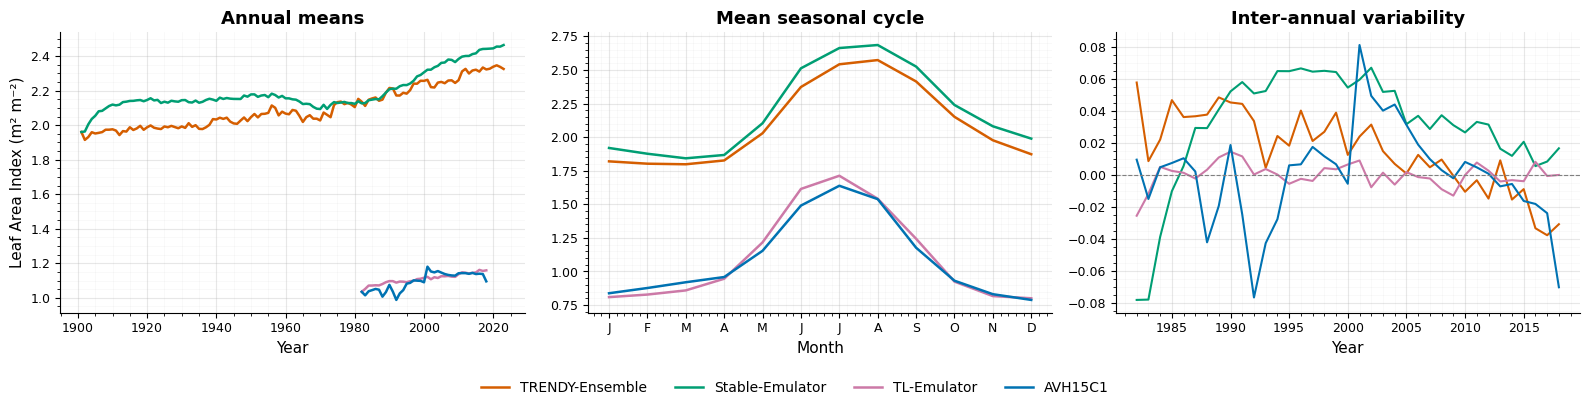

In [37]:
fig, axes = plot_lai_annual_seasonality_iav_four_series(
    ensmean_S3_lai_annual_mean,
    Stable_Emulator_S3_lai_annual_mean,
    TL_Emulator_S3_lai_annual_mean,
    avh15c1_lai_annual_mean,
    ensmean_S3_lai_seasonality,
    Stable_Emulator_S3_lai_seasonality,
    TL_Emulator_S3_lai_seasonality,
    avh15c1_lai_seasonality,
    ensmean_S3_lai_iav,
    Stable_Emulator_S3_lai_iav,
    TL_Emulator_S3_lai_iav,
    avh15c1_lai_iav,
    var_label="Leaf Area Index",
    units="m² m⁻²",
    start_year=1982,
    end_year=2018,
)
plt.show()